<a href="https://colab.research.google.com/github/COLLS003/Nile/blob/main/Nile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# all our imports
import pandas as pd
# testing 123.....


In [ ]:
df = pd.read_csv("rejects.csv")
df.head()


,Email,Status
0,Thank you for applying to the Junior Software ...,reject
1,Thank you for your interest in the Train To Hi...,reject
2,"eth, \n\nThank you for your interest in Exyn a...",reject
3,Thank you for your interest in the Software En...,reject
4,"Hi Seth,\n\nThank you for your interest in Pat...",reject


In [ ]:
# get the frequent distribution
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

emails = df.Email.str.cat(sep='')
# split the text into words
tokens = word_tokenize(emails)
# set the vocabulary
vocabulary = set(tokens)
print(len(vocabulary))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2220


In [ ]:
# get the frequently used words
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[:50]

[',',
 '.',
 'you',
 'to',
 'your',
 'the',
 'and',
 'for',
 'in',
 'with',
 'we',
 'of',
 'our',
 'a',
 'We',
 'at',
 'interest',
 'this',
 'that',
 'have',
 'Software',
 'will',
 'on',
 'not',
 'be',
 'position',
 'are',
 ':',
 'application',
 'Engineer',
 'time',
 '!',
 'Thank',
 '-',
 'is',
 'job',
 '(',
 ')',
 'Unfortunately',
 'an',
 'or',
 'Developer',
 'can',
 'forward',
 'The',
 '’',
 'as',
 'more',
 'other',
 'resume']

In [ ]:
# removet the stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not  w in stop_words]
print(tokens)


['Thank', 'applying', 'Junior', 'Software', 'Developer', 'position', 'MSC', 'Technology', '.', 'Unfortunately', ',', 'MSC', 'Technology', 'moved', 'next', 'step', 'hiring', 'process', ',', 'application', 'selected', 'time.Thank', 'interest', 'Train', 'To', 'Hire', '-', 'Junior', 'Software', 'Developer', 'position', 'Mindlance', 'Chicago', ',', 'Illinois', ',', 'United', 'States', '.', 'Unfortunately', ',', 'moving', 'forward', 'application', ',', 'appreciate', 'time', 'interest', 'Mindlance.eth', ',', 'Thank', 'interest', 'Exyn', 'applying', 'apart', 'team', 'Software', 'Engineer', ',', 'Product', '.', 'We', 'appreciate', 'opportunity', 'learn', 'professional', 'accomplishments', '.', 'We', 'fortunate', 'received', 'many', 'terrific', 'applications', '.', 'Although', 'impressed', 'background', ',', 'decided', 'move', 'forward', 'candidates', 'whose', 'skills', 'experiences', 'better', 'aligned', "'re", 'seeking', 'particular', 'role', '.', 'As', 'Exyn', 'continues', 'grow', ',', '’', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


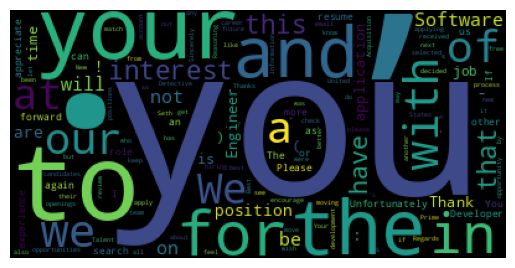

In [ ]:
# lets try to visualize the data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# initialsie the wordcloud
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# update the status columsn
modified_df = df.copy()
modified_df['Status'] = modified_df['Status'].map({'reject': 1, 'not_reject': 0})
features = modified_df['Email']
labels = modified_df['Status']
# get the data shape
print("shape1", features.shape)
print("shape2", labels.shape)


shape1 (129,)
shape2 (129,)


In [ ]:
# split train and test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
# text classifier
vectorizer                 = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
features_train_transformed = vectorizer.fit_transform(features_train)
features_test_transformed  = vectorizer.transform(features_test)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
### Feature selection, because text is super high dimensional and
### can be really computationally chewy as a result
# selector = SelectPercentile(f_classif, percentile=10)
selector = SelectPercentile(f_classif, percentile=1)

selector.fit(features_train_transformed, labels_train)
features_train_transformed = selector.transform(features_train_transformed).toarray()
features_test_transformed  = selector.transform(features_test_transformed).toarray()

with open('selector.pkl', 'wb') as f:
    pickle.dump(selector, f)


In [ ]:
# prompt: try training using regression

from sklearn.linear_model import LogisticRegression
import pickle

# initialise the classifier
reg_classifier = LogisticRegression()
# try to fit the data
reg_classifier.fit(features_train_transformed, labels_train)
# lets see the score of the model
score = reg_classifier.score(features_test_transformed, labels_test)
print(score)

# Save the trained model to a file using pickle
with open('reg_classifier.pkl', 'wb') as f:
    pickle.dump(reg_classifier, f)


0.9743589743589743


In [ ]:
# prompt: try usig descision treee

from sklearn.tree import DecisionTreeClassifier

# initialise the classifier
dt_classifier = DecisionTreeClassifier()
# try to fit the data
dt_classifier.fit(features_train_transformed, labels_train)
# lets see the score of the model
score = dt_classifier.score(features_test_transformed, labels_test)
print(score)


0.9487179487179487


In [ ]:
def transform_text_for_check(email):
    # Tokenize the email
    tokens = word_tokenize(email)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    # Transform into TF-IDF representation
    transformed_email = vectorizer.transform([" ".join(tokens)])
    transformed_email = selector.transform(transformed_email).toarray()

    return transformed_email

In [ ]:
email = """Thank you for your interest in Safaricom and the Operations & Growth Lead position. We received an overwhelming number of responses, which makes us feel both humble and proud that so many talented individuals (you included) want to join our team. We know how much effort goes into each application and we appreciate the time taken to contact us. This volume of responses makes for an extremely competitive selection process. Although your profile is impressive, we regret to inform you that we have decided to pursue other candidates for the position at this time.
However, we are always keen on hearing from talented people and therefore, we strongly encourage you to continue applying for other vacancies advertised on our career website in an area that matches your skillset and experience. Also remember to keep your profile up to date so you can be the first to hear about new job openings.
Once again, thank you so much for investing your time to make this application. Let’s keep in touch and hopefully we’ll speak again in the near future.
"""

transformed_email = transform_text_for_check(email)
prediction = reg_classifier.predict(transformed_email)
def convert_respone(code):
  if code == 0:
    return "not reject"
  elif code == 1:
    return "reject email"
  else:
    return "Cant determine"
print("Prediction:", convert_respone(prediction))

Prediction: reject email


In [51]:
# import the module once
from google_colab_shell import getshell

ModuleNotFoundError: No module named 'google_colab_shell'